In [1]:
## Read a sample audio using librosa
import librosa
auto_file_path = 'UrbanSound8K/11722-3-1-0.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(auto_file_path)


In [2]:
print(librosa_audio_data)

[ 9.41825965e-06  9.02754527e-06  1.02232498e-05 ... -1.09545945e-04
 -9.02553729e-05 -7.51700281e-05]


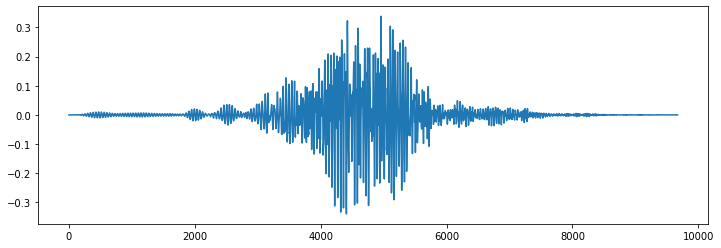

In [3]:
# Plot librosa_audio_data:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)
#librosa convert signal to mono, meaning the channel will always be 1

In [4]:
# read with scipy
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio =wav.read(auto_file_path)

In [5]:
wave_audio

array([[ 136704,  -50176],
       [ -83200,   74752],
       [ 128768,  -37888],
       ...,
       [-596736,  236544],
       [-478720,  174848],
       [-472064,  195072]])

In [6]:
wave_sample_rate

44100

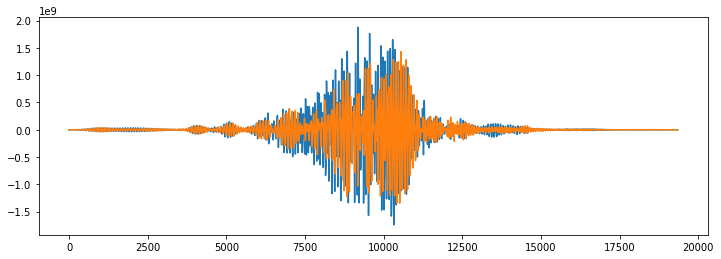

In [7]:
import matplotlib.pyplot as plt
#Original audio with 2 channels:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

######Extract Feature
MFCC (Mel-Frequency Cepstral Coefficients): 
MFCC summaries frequency distribution across the window size, so it is possible to analyse both  the frequency and time characteristics of the sound. These audio repretations will allow us to identify features for classification.

In [8]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 19)


In [9]:
mfccs

array([[-6.29074463e+02, -6.25328369e+02, -6.23461182e+02,
        -6.00444092e+02, -5.70428650e+02, -5.14038147e+02,
        -4.35360504e+02, -3.48851807e+02, -3.04546814e+02,
        -2.85228516e+02, -2.96869751e+02, -3.40414734e+02,
        -4.07209198e+02, -4.67511414e+02, -5.03433899e+02,
        -5.42048584e+02, -5.73908386e+02, -5.97554443e+02,
        -6.21009521e+02],
       [ 2.59614143e+01,  3.06188316e+01,  3.28600388e+01,
         5.07588005e+01,  7.90380554e+01,  1.24058556e+02,
         1.51411957e+02,  1.55516418e+02,  1.57771912e+02,
         1.63308578e+02,  1.65212250e+02,  1.61767502e+02,
         1.52900330e+02,  1.29250122e+02,  1.12538010e+02,
         8.83403168e+01,  6.45349884e+01,  4.49066696e+01,
         2.54685078e+01],
       [ 1.71773911e+01,  2.00737915e+01,  2.12429600e+01,
         1.81430283e+01,  1.70546875e+01,  4.31012249e+00,
        -5.97024002e+01, -1.22305130e+02, -1.43772110e+02,
        -1.50268524e+02, -1.51434952e+02, -1.38203918e+02,
    

In [10]:
!dir

 Volume in drive E is Other
 Volume Serial Number is D6E2-8A07

 Directory of E:\Audioclassification

04/05/2022  12:03 PM    <DIR>          .
04/05/2022  12:03 PM    <DIR>          ..
04/04/2022  04:39 PM    <DIR>          .ipynb_checkpoints
04/05/2022  12:03 PM             7,903 Audio Classification Data Preprocessing.ipynb
04/04/2022  04:33 PM           375,726 Audio Classification EDA.ipynb
04/04/2022  04:45 PM    <DIR>          UrbanSound8K
               2 File(s)        383,629 bytes
               4 Dir(s)  15,865,614,336 bytes free


In [11]:
###Extract MFCC 's for every audio file
import pandas as pd
import os
import librosa
audio_dataset_path = 'UrbanSound8K/audio/'
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [12]:
def features_extractor(file):
    audio, sample_rate =librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc =40)
    mfccs_scaled_features = np.mean(mfccs.T,axis=0)
    return  mfccs_scaled_features

In [13]:
import numpy as np
from tqdm import tqdm

In [ ]:
##We iterate every audio file and extract features
##using Mel-Frequency Cepstal Coefficients

In [14]:
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row["fold"]) +'/', str(row["slice_file_name"]))
    final_class_labels= row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    

3554it [03:50, 16.93it/s]C:\Users\vutru\miniconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [08:29, 23.99it/s]C:\Users\vutru\miniconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\vutru\miniconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [08:51, 16.43it/s]


In [15]:
###Converting extracted_features to pandas Dataframe
extracted_features_df =pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[-488.77487, 100.85386, -50.4496, -65.98483, -...",dog_bark
1,"[-488.77487, 100.85386, -50.4496, -65.98483, -...",children_playing
2,"[-488.77487, 100.85386, -50.4496, -65.98483, -...",children_playing
3,"[-488.77487, 100.85386, -50.4496, -65.98483, -...",children_playing
4,"[-488.77487, 100.85386, -50.4496, -65.98483, -...",children_playing
5,"[-488.77487, 100.85386, -50.4496, -65.98483, -...",children_playing
6,"[-488.77487, 100.85386, -50.4496, -65.98483, -...",children_playing
7,"[-488.77487, 100.85386, -50.4496, -65.98483, -...",children_playing
8,"[-488.77487, 100.85386, -50.4496, -65.98483, -...",children_playing
9,"[-488.77487, 100.85386, -50.4496, -65.98483, -...",car_horn


In [17]:
###Split the dataset into independent & dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [18]:
#Label Encoding
y = np.array(pd.get_dummies(y))

In [19]:
y.shape

(8732, 10)

In [20]:
#Train test slpit
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [21]:
X_train

array([[-488.77487  ,  100.85386  ,  -50.4496   , ...,   -1.5497302,
          -4.4666576,   -3.634536 ],
       [-488.77487  ,  100.85386  ,  -50.4496   , ...,   -1.5497302,
          -4.4666576,   -3.634536 ],
       [-488.77487  ,  100.85386  ,  -50.4496   , ...,   -1.5497302,
          -4.4666576,   -3.634536 ],
       ...,
       [-488.77487  ,  100.85386  ,  -50.4496   , ...,   -1.5497302,
          -4.4666576,   -3.634536 ],
       [-488.77487  ,  100.85386  ,  -50.4496   , ...,   -1.5497302,
          -4.4666576,   -3.634536 ],
       [-488.77487  ,  100.85386  ,  -50.4496   , ...,   -1.5497302,
          -4.4666576,   -3.634536 ]], dtype=float32)

In [22]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
X_train.shape

(6985, 40)

In [24]:
X_test.shape

(1747, 40)

In [25]:
y_train.shape

(6985, 10)

In [26]:
y_test.shape

(1747, 10)

In [ ]:
##Model Creation:


In [27]:
!pip install tensorflow

In [28]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [37]:
#No of classes:
num_labels = y.shape[1]

In [38]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4100      
                                                                 
 activation_3 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 200)               20200     
                                                                 
 activation_4 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 100)              

In [41]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [42]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
204/219 [==========================>...] - ETA: 0s - loss: 16.2101 - accuracy: 0.1026
Epoch 1: val_loss improved from inf to 2.29417, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 4ms/step - loss: 15.3360 - accuracy: 0.1016 - val_loss: 2.2942 - val_accuracy: 0.1173
Epoch 2/100
208/219 [===========================>..] - ETA: 0s - loss: 2.4788 - accuracy: 0.1092
Epoch 2: val_loss improved from 2.29417 to 2.28282, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.4730 - accuracy: 0.1088 - val_loss: 2.2828 - val_accuracy: 0.1236
Epoch 3/100
202/219 [==========================>...] - ETA: 0s - loss: 2.3172 - accuracy: 0.1143
Epoch 3: val_loss improved from 2.28282 to 2.27551, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.3145 - accuracy: 0.1124 - val_loss: 2.2755 - val_accuracy: 0.11

Epoch 29/100
215/219 [============================>.] - ETA: 0s - loss: 2.2559 - accuracy: 0.1081
Epoch 29: val_loss did not improve from 2.26850
219/219 [==============================] - 1s 3ms/step - loss: 2.2561 - accuracy: 0.1078 - val_loss: 2.2698 - val_accuracy: 0.1042
Epoch 30/100
212/219 [============================>.] - ETA: 0s - loss: 2.2562 - accuracy: 0.1101
Epoch 30: val_loss did not improve from 2.26850
219/219 [==============================] - 1s 3ms/step - loss: 2.2561 - accuracy: 0.1117 - val_loss: 2.2697 - val_accuracy: 0.1042
Epoch 31/100
213/219 [============================>.] - ETA: 0s - loss: 2.2562 - accuracy: 0.1163
Epoch 31: val_loss did not improve from 2.26850
219/219 [==============================] - 1s 3ms/step - loss: 2.2561 - accuracy: 0.1171 - val_loss: 2.2698 - val_accuracy: 0.1042
Epoch 32/100
215/219 [============================>.] - ETA: 0s - loss: 2.2559 - accuracy: 0.1174
Epoch 32: val_loss did not improve from 2.26850
219/219 [==============

Epoch 59/100
216/219 [============================>.] - ETA: 0s - loss: 2.2559 - accuracy: 0.1128
Epoch 59: val_loss did not improve from 2.26850
219/219 [==============================] - 1s 3ms/step - loss: 2.2561 - accuracy: 0.1128 - val_loss: 2.2698 - val_accuracy: 0.1048
Epoch 60/100
202/219 [==========================>...] - ETA: 0s - loss: 2.2556 - accuracy: 0.1123
Epoch 60: val_loss did not improve from 2.26850
219/219 [==============================] - 1s 3ms/step - loss: 2.2562 - accuracy: 0.1117 - val_loss: 2.2698 - val_accuracy: 0.1042
Epoch 61/100
211/219 [===========================>..] - ETA: 0s - loss: 2.2557 - accuracy: 0.1151
Epoch 61: val_loss did not improve from 2.26850
219/219 [==============================] - 1s 3ms/step - loss: 2.2561 - accuracy: 0.1151 - val_loss: 2.2698 - val_accuracy: 0.1042
Epoch 62/100
214/219 [============================>.] - ETA: 0s - loss: 2.2560 - accuracy: 0.1086
Epoch 62: val_loss did not improve from 2.26850
219/219 [==============

Epoch 89/100
215/219 [============================>.] - ETA: 0s - loss: 2.2558 - accuracy: 0.1173
Epoch 89: val_loss did not improve from 2.26850
219/219 [==============================] - 1s 3ms/step - loss: 2.2561 - accuracy: 0.1171 - val_loss: 2.2700 - val_accuracy: 0.1042
Epoch 90/100
218/219 [============================>.] - ETA: 0s - loss: 2.2562 - accuracy: 0.1171
Epoch 90: val_loss did not improve from 2.26850
219/219 [==============================] - 1s 3ms/step - loss: 2.2561 - accuracy: 0.1171 - val_loss: 2.2698 - val_accuracy: 0.1048
Epoch 91/100
216/219 [============================>.] - ETA: 0s - loss: 2.2563 - accuracy: 0.1139
Epoch 91: val_loss did not improve from 2.26850
219/219 [==============================] - 1s 3ms/step - loss: 2.2561 - accuracy: 0.1138 - val_loss: 2.2698 - val_accuracy: 0.1048
Epoch 92/100
216/219 [============================>.] - ETA: 0s - loss: 2.2562 - accuracy: 0.1094
Epoch 92: val_loss did not improve from 2.26850
219/219 [==============

In [43]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.10475099831819534


In [49]:
filename="UrbanSound8K/dog_bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
#model.predict_classes(prediction_feature)
#predicted = np.argmax,axis=1)
predict =model.predict(prediction_feature)

In [50]:
np.argmax(predict,axis=1)

array([9], dtype=int64)